In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
df = sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [26]:
df = df.dropna()

In [27]:
y = df['mpg']
x = df['horsepower']
x = sm.add_constant(x)

In [29]:
model = sm.OLS(y, x)
result = model.fit()

In [30]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           7.03e-81
Time:                        13:30:21   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

### 1. R-square = 60.6%. Model dapat menjelaskan variasi nilai MPG sebesar 60.6% sisanya dijelaskan oleh variabel lain yang tidak ada dalam model
### 2. Prob (F-statistics) = 0.0000...703 < 0.05 = Horsepower berpengaruh secara signifikan terhadap MPG
### 3. Prob (T-Statistics) (P-Value)
### - b0: 0.000 < 0.05 = Perlu intercept dalam model
### - b1: 0.000 < 0.05 = Horsepower berpengaruh secara positif terhadap MPG
### 4. Coef b0 & b1, model: MPG = 39.9359 - 0.1578 x (horsepower)
### - b0: 39.9359 nilai MPG saat horsepower 0
### - b1: -0.1578, setiap kenaikan 1 horspower maka MPG akan berkurang kira2 sebesar (0.1578)

In [43]:
df1 = sns.load_dataset('diamonds')
df1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [38]:
x = df1.drop(columns = ['price'])
y = df1['price']
x = pd.get_dummies(x, columns = ['cut', 'color', 'clarity'], drop_first = True)
x = sm.add_constant(x)
x

,const,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,1.0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.21,59.8,61.0,3.89,3.84,2.31,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,0.23,56.9,65.0,4.05,4.07,2.31,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1.0,0.29,62.4,58.0,4.20,4.23,2.63,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1.0,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.0,0.72,60.8,57.0,5.75,5.76,3.50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53936,1.0,0.72,63.1,55.0,5.69,5.75,3.61,0,0,1,...,0,0,0,0,0,0,0,1,0,0
53937,1.0,0.70,62.8,60.0,5.66,5.68,3.56,0,1,0,...,0,0,0,0,0,0,0,1,0,0
53938,1.0,0.86,61.0,58.0,6.15,6.12,3.74,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [40]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [39]:
model = sm.OLS(y, x)
result = model.fit()

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Mon, 20 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:43:04   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8362.4914    390.186     21.432

### 1. Adj. R-Square = 92%. Variasi nilai Price sebesar 92%, sisanya tidak dijelaskan oleh variabel lain. 
### 2. Prob (F-Statistic) = 26.880.000 > 0.05. Ada salah satu atau lebih variabel independen yang berpengaruh terhadap Price
### 3. Prob (T-Statistic) (P-value)
### - b0: 0.000 < 0.05 Model perlu intercept
### - b1: 0.000 < 0.05 Carat berpengaruh positif terhadap Price
### - b2: 0.000 < 0.05 Depth berpengaruh positif terhadap Price
### - b3: 0.000 < 0.05 Table berpengaruh positif terhadap price
### - b4: 0.000 < 0.05 x berpangeruh positif terhadap price
### - b5: 0.619 > 0.05 y tidak berpengaruh terhadap price
### - b6: 0.134 > 0.05 z tidak berpengaruh terhadap price
### - .....
### 4. b0, b1 .......b20. Price = 8362.4914 + 11.260.000 carat - 63,8061 depth - 26.4741 table .......... - 5345.1022 clarity_I1
### - b0: 8362.4914 nilai price saat semua variabel independen adalah nol
### - b1: 11.260.000 Tiap kenaikan carat sebesar 1 maka price akan meningkat sebesar 11.260.000

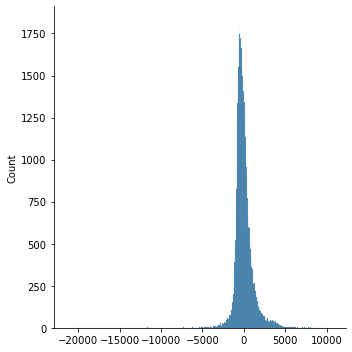

In [44]:
sns.displot(result.resid)

sns.scatterplot(x = result.fittedvalues, y = result.resid)
sns.lineplot(resilt.fittedvalues, 0 